In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import sklearn
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml
df=fetch_openml('titanic',version=1,as_frame=True)['data']
display(df.head())

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
# Feature engineering : The process of transforming raw data into meaningful inputs (features) that improve the performance of a machine learning model


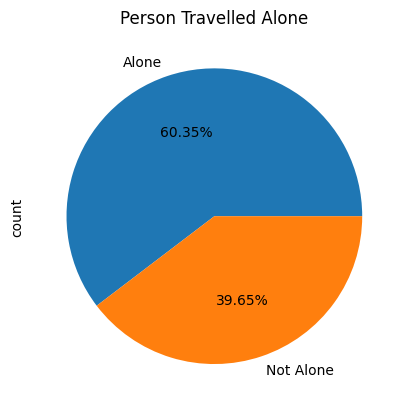

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family,travelled alone,female,male
0,1,"Allen, Miss. Elisabeth Walton",1.0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,1.0,1.0,0.0
1,1,"Allison, Master. Hudson Trevor",0.0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,0.0,0.0,1.0
2,1,"Allison, Miss. Helen Loraine",1.0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0.0,1.0,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",0.0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,0.0,0.0,1.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0.0,1.0,0.0
5,1,"Anderson, Mr. Harry",0.0,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0,1.0,0.0,1.0


In [ ]:
df['family']=df['sibsp']+ df['parch']
df.loc[df['family']>0,'travelled alone']=0 # if the condition is true then set it as 0 . not travelled alone 
df.loc[df['family']==0,'travelled alone']=1 # if the condition is true then set it as 1 . travelled alone 
df['travelled alone'].map({0:'Not Alone',1:"Alone"}).value_counts().plot(title='Person Travelled Alone',kind='pie',autopct='%1.2f%%')
plt.show()
#autopct='%1.2f%%' in this %1 shows integer part .2f shows till two num after decimal %% to represent the percentage because single % has another meaning in python

#Data Encoding: The process of converting categorical/text data into numerical form so that machine learning algorithms can understand and process it.
# One-Hot Encoding = Representing categorical data as independent binary columns (0/1) instead of a single number.
from sklearn.preprocessing import OneHotEncoder
df[['female','male']]=OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[['sex','female','male']].head(6)
# converting the female and male category into numeric value for ML model training . Now converting the sex column into numeric format
df['sex']=OneHotEncoder().fit_transform(df[['sex']]).toarray() # for female 1 and for male 0
display(df.head(6))